## Introduction to Machine Learning, Summer 2021 
### Assignment 2: $\ell_p$, logistic regression and quadratic neural nets

__Given date:__ June 11

__Due date:__ June 25

__Total:__ 20pts + 5pts

### Question 1. (5pts) $\ell_p$ norm minimization

The use of the $\ell_p$ norm can sometimes yield sparser solutions. In this exercise, we will consider the reconstruction of sparse signal from the minimization of the $\ell_p$ norm for $p=0.5$


We start by considering a simple one dimensional signal $x$ with only a few non zero features (as shown below). 

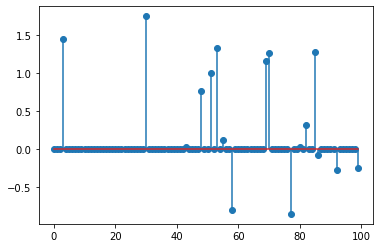

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x0 = np.zeros((100,1))

ind = np.random.choice(np.arange(0,len(x0)), 20)

x0[ind] = np.random.normal(0,1,np.shape(ind)).reshape(-1,1)

plt.stem(x0)
plt.show()

We will consider the recovery of the vector above given measurements of the form $\mathbf{y} = A\mathbf{x}$. In this case, we will take the matrix $A$ to be given by a random subset of the rows of the DFT matrix given below. 

In [60]:
N = len(x0)
import numpy as np
pi=np.pi


import numpy as np
def DFT_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * pi * 1J / N )
    W = np.power( omega, i * j ) / np.sqrt(N)
    return W

measurements = np.matmul(DFT_matrix(len(x0)),(x0.reshape(-1,1)))

idx = np.random.choice(len(x), size = 30, replace = False)
A = DFT_matrix(len(x0))[idx,:]

w, v = np.linalg.eig(np.matmul(A, np.conjugate(A).T))
b = measurements[idx]

We thus want to solve the problem

\begin{align}
\min &\quad \left\|\mathbf{x}\right\|_{p}\\
\text{s.t.} & \quad A \mathbf{x} = \mathbf{b} 
\end{align}

On approach is to rely on a projection of the gradient onto the constraint $A\mathbf{x} = b$. Projection onto the constraint can be done through the step 

\begin{align}
\min_{\mathbf{x}} &\quad \left\|\mathbf{x} - \mathbf{x}^*\right\|_2\\
\text{subject to} & \quad A\mathbf{x} = \mathbf{b}
\end{align}

where $\mathbf{x}^*$ is the current point. The solution to the above problem can be computed in closed form as 

\begin{align}
\mathbf{x} = \mathbf{x}^* + A^*(AA^*)^{-1}(b - Ax^*)
\end{align}

where $A^*$ is the adjoint (conjugate transpose) of the matrix $A$. The iterations then take the following form
\begin{align}
\mathbf{x} &\leftarrow \mathbf{x} - \eta*d_k\\
\mathbf{x} &\leftarrow \mathcal{P}_{A\mathbf{x} = \mathbf{b}}(\mathbf{x})\\
\end{align}

Here $\mathcal{P}_{A\mathbf{x} = \mathbf{b}}(\mathbf{x})$ corresponds to $\mathbf{x}^* + A^*(AA^*)^{-1}(b - Ax^*)$ and if we minimize $\frac{1}{p}\|\mathbf{x}\|_p^p$, the gradient can be written as 
\begin{align}
(d_k)_\ell = |\mathbf{x}_\ell|^{p-2} \mathbf{x}_\ell
\end{align}

to avoid division by $0$ we will replace $|\mathbf{x}_\ell|$ with $\sqrt{|\mathbf{x}_\ell|^2 + \varepsilon^2}$ for some small $\varepsilon$

__Question 1.1.__ Apply a few steps of the projected gradient method (1000) and compare the results for $p = 1, 2$ and $p=0.5$

### Question 2. (10pts) Logistic regression for digit recognition

When considering logistic regression, one approach is to apply gradient updates on the log likelihood. In this exercise, we will use logistic regression to discriminate between two digits. Use the lines below to load the MNIST data from scikit learn. 

In [81]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Images from the original MNIST dataset are of size 28 by 28. Those images are stored as the rows of the X matrix above as 784 feature vectors. In this exercise, you will learn a classifier to discriminate between images of the 0 digit and of the digit 1. 

__Question 2.1 (1pts).__ Start by gathering all the images of 0 and 1 by using the target vector $y$

__Question 2.2. (1pts)__ Once you have the images, fill out the expression of the function 
sigmoid below wich should return the value of the function and its derivative for a _vector_ $\mathbf{x}$ 

__Question 2.3. (4pts)__ Using the function sigmoid above, write a code that returns the expression of the log likelihood for an image $\mathbf{x}_i$ with associated target $y_i = 0, 1$. Then compute the gradient of this loss.  

__Question 2.4. (4pts)__ Run SGD on the log likelihood and plot the evolution of the log loss throughout the iterations. Take a sufficiently small learning rate (0.005 - 0.0025) and consider multiple epochs (~15) with batch size (10 - 100) 

### Question 3 (5pts) Intriguing properties of quadratic neural networks

We consider a simple shallow network with quadratic activation functions. We will repeat the following experiments:

1- Generate a random dataset in dimension $d$ for $d = 2, 3, 5$ and $10$ by taking $\mathbf{x}_i \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$ (multivariate Gaussian with mean 0 and covariance given by the identity), and $t_i\sim \mathcal{N}(0,1)$

2- We consider a shallow neural network with quadratic activations as given below

\begin{align}
h_{\mathbf{v}, \mathbf{W}}(\mathbf{x}) = \sum_{\ell=1}^k \mathbf{v}_\ell \phi(\langle \mathbf{w}_\ell, \mathbf{x} \rangle)
\end{align}

Such a network can be written compactly by stacking the vectors $\mathbf{w}_\ell$ and scalars $v_\ell$ in the matrix $\mathbf{W}$ and vector $\mathbf{v}$ as 

\begin{align}
\mathbf{W} = \left[\begin{array}{c}
\mathbf{w}_1^T\\
\mathbf{w}_2^T \\
\vdots\\
\mathbf{w}_k^T
\end{array}\right]\quad \mathbf{v} = \left[\begin{array}{c}
v_1 \\
v_2 \\
\vdots \\
v_k
\end{array}\right]
\end{align} 
From this, we can write the model as 
\begin{align}
h_{\mathbf{v}, \mathbf{W}}(\mathbf{x}) = \mathbf{v}^T \phi(\mathbf{W}\mathbf{x})
\end{align}

We consider the minimization of the loss (for any $\mathbf{v}$):

\begin{align}
\ell(\mathbf{W}) \frac{1}{2n} \sum_{i=1}^n \left(y_i - \mathbf{v}^T\phi(\mathbf{W}\mathbf{x}_i)\right)^2
\end{align}


3- Take $d\leq n\leq c d^2$ and start gradient descent on the loss given above for $\mathbf{v}=\mathbf{1}$ and $\mathbf{W}$ generated as $\mathbf{W}_{ij}\sim \mathcal{N}(0,1)/\sqrt{d}$. wait for the iterations to converge. Repeat your experiments for several choices of $\mathbf{W}$, $d$ and $k$. Start by taking $k$ smaller than $k$, then gradually increase $k$ so that it ultimately becomes larger than $d$. Plot the evolution of the loss for each experiment. Compare the evolution 

In [ ]:
# generating the dataset


